#  WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

# Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Establish base URL to test a city
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Boston"


# Build query URL
query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key

In [4]:
weather_api_key

'6962f560fa21a8b51ee47bdc81ac5877'

In [5]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 33.96,
  'feels_like': 26.01,
  'temp_min': 32,
  'temp_max': 36,
  'pressure': 1016,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 20},
 'clouds': {'all': 90},
 'dt': 1611767640,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1611748944,
  'sunset': 1611784288},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create empty lists to hold the temperature, humidity, cloudiness, and wind speeds of each city 
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
city_names = []
country = []
date = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key
    weather_response = requests.get(query_url).json()
    
    try: 
        max_temperature.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        city_names.append(weather_response['name'])
        print(f"Processing Record {city}")
        
    except:
        print("City not found. Skipping")
        pass

Processing Record itau de minas
Processing Record roblin
Processing Record kasongo-lunda
Processing Record albany
Processing Record sao filipe
Processing Record aklavik
Processing Record puerto ayora
Processing Record mataura
Processing Record flin flon
Processing Record busselton
City not found. Skipping
Processing Record port elizabeth
Processing Record port alfred
Processing Record weymouth
Processing Record khatanga
Processing Record faya
Processing Record camacha
Processing Record ribeira grande
Processing Record teya
Processing Record moranbah
Processing Record hilo
Processing Record erzin
Processing Record dingle
Processing Record yellowknife
City not found. Skipping
Processing Record punta arenas
Processing Record lakes entrance
Processing Record vostok
Processing Record buala
Processing Record altay
Processing Record itaquyry
Processing Record kaitangata
Processing Record kashi
Processing Record victoria
City not found. Skipping
City not found. Skipping
City not found. Skippin

Processing Record lompoc
Processing Record beringovskiy
Processing Record mali
Processing Record digby
Processing Record paita
Processing Record kirakira
Processing Record yar-sale
Processing Record tadine
Processing Record carlisle
Processing Record berlevag
Processing Record sao jose da coroa grande
Processing Record broken hill
Processing Record pacific grove
City not found. Skipping
Processing Record isla mujeres
Processing Record russell
Processing Record seoul
Processing Record northam
Processing Record lagoa
Processing Record pijao
Processing Record saint anthony
Processing Record marzuq
Processing Record udachnyy
Processing Record kuldiga
Processing Record korla
Processing Record guaruja
Processing Record agdam
Processing Record nouadhibou
Processing Record esperance
Processing Record ceres
Processing Record belaya gora
Processing Record florina
Processing Record asosa
Processing Record yurty
Processing Record hithadhoo
City not found. Skipping
Processing Record yerofey pavlovi

# Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [7]:
print(len(city_names))
print(len(latitude))
print(len(longitude))
print(len(max_temperature))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

545
545
545
545
545
545
545
545
545


In [8]:
weather_df = pd.DataFrame({'City': city_names,
                           'Latitude': latitude,
                           'Longitude': longitude,
                           'Max Temp': max_temperature,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itaú de Minas,-20.7394,-46.7522,79.11,78,98,5.21,BR,1611767711
1,Roblin,51.2300,-101.3565,-10.70,87,60,6.35,CA,1611767711
2,Kasongo-Lunda,-6.4667,16.8167,72.63,89,100,2.33,CD,1611767711
3,Albany,42.6001,-73.9662,32.00,64,93,13.00,US,1611767160
4,São Filipe,14.8961,-24.4956,76.93,62,0,5.66,CV,1611767238
...,...,...,...,...,...,...,...,...,...
540,Ojinaga,29.5667,-104.4167,46.40,42,1,4.61,MX,1611767263
541,Kalmunai,7.4167,81.8167,75.97,77,100,10.09,LK,1611767284
542,Arys,42.4252,68.7950,30.20,93,0,2.24,KZ,1611767785
543,Mossamedes,-15.1961,12.1522,77.97,68,92,11.70,AO,1611767785


In [9]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.427359,21.774421,50.515101,71.339450,57.291743,8.864661,1.611768e+09
std,32.835059,91.962711,34.758997,20.007269,38.507128,6.200153,2.745775e+02
min,-54.800000,-179.166700,-52.010000,7.000000,0.000000,0.450000,1.611767e+09
25%,-7.470600,-62.950000,28.990000,62.000000,19.000000,4.380000,1.611767e+09
50%,22.890900,25.570100,61.610000,76.000000,75.000000,7.020000,1.611768e+09
75%,45.020500,105.893300,78.370000,86.000000,91.000000,12.190000,1.611768e+09
max,78.218600,179.316700,101.230000,100.000000,100.000000,39.120000,1.611768e+09


In [10]:
# Create the output File (CSV)
weather_df_csv = "WeatherPy.csv"
# Export the city_data into a csv
weather_df.to_csv(weather_df_csv, index_label="City_ID")

#  Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [11]:
#  Create a new DataFrame only with cities that have humidity less than or equal to 100% 
humidity_df = weather_df[weather_df["Humidity"] <= 100]
humidity_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itaú de Minas,-20.7394,-46.7522,79.11,78,98,5.21,BR,1611767711
1,Roblin,51.2300,-101.3565,-10.70,87,60,6.35,CA,1611767711
2,Kasongo-Lunda,-6.4667,16.8167,72.63,89,100,2.33,CD,1611767711
3,Albany,42.6001,-73.9662,32.00,64,93,13.00,US,1611767160
4,São Filipe,14.8961,-24.4956,76.93,62,0,5.66,CV,1611767238
...,...,...,...,...,...,...,...,...,...
540,Ojinaga,29.5667,-104.4167,46.40,42,1,4.61,MX,1611767263
541,Kalmunai,7.4167,81.8167,75.97,77,100,10.09,LK,1611767284
542,Arys,42.4252,68.7950,30.20,93,0,2.24,KZ,1611767785
543,Mossamedes,-15.1961,12.1522,77.97,68,92,11.70,AO,1611767785


In [12]:
humidity_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.427359,21.774421,50.515101,71.339450,57.291743,8.864661,1.611768e+09
std,32.835059,91.962711,34.758997,20.007269,38.507128,6.200153,2.745775e+02
min,-54.800000,-179.166700,-52.010000,7.000000,0.000000,0.450000,1.611767e+09
25%,-7.470600,-62.950000,28.990000,62.000000,19.000000,4.380000,1.611767e+09
50%,22.890900,25.570100,61.610000,76.000000,75.000000,7.020000,1.611768e+09
75%,45.020500,105.893300,78.370000,86.000000,91.000000,12.190000,1.611768e+09
max,78.218600,179.316700,101.230000,100.000000,100.000000,39.120000,1.611768e+09


# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

#  Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

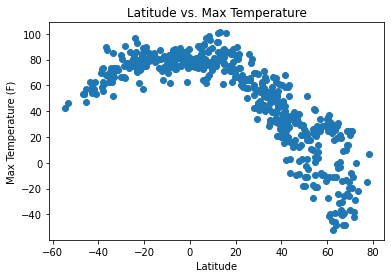

In [13]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
temperature_scatter = humidity_df["Max Temp"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, temperature_scatter)

# Add title and labels
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#  Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

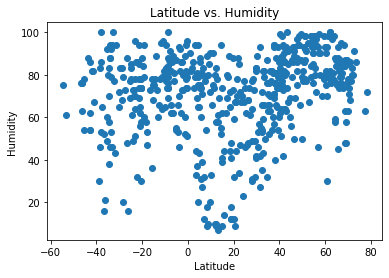

In [14]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
humidity_scatter = humidity_df["Humidity"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, humidity_scatter)

# Add title and labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

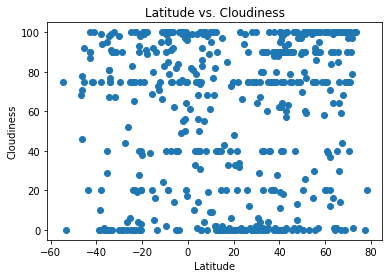

In [15]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
cloudiness_scatter = humidity_df["Cloudiness"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, cloudiness_scatter)

# Add title and labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

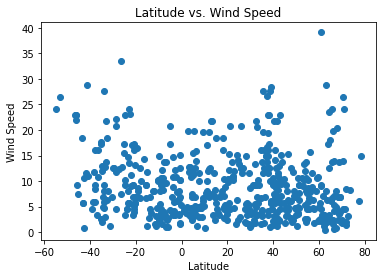

In [16]:
# Pull out the latitude and temperature
latitude_scatter = humidity_df["Latitude"]
wind_scatter = humidity_df["Wind Speed"]

# Plot the results in a scatter plot
plt.scatter(latitude_scatter, wind_scatter)

# Add title and labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#  Linear Regression

In [17]:
northern_hem_df = humidity_df[humidity_df["Latitude"] >= 0] 
southern_hem_df = humidity_df[humidity_df["Latitude"] <= 0]

#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7666359176689409


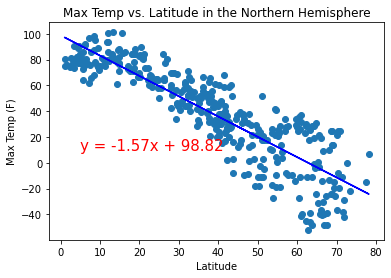

In [18]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_max_temp = northern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_max_temp)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_max_temp)
plt.plot(northern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (5,10), fontsize=15, color ="red")
plt.title("Max Temp vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.42312517927219734


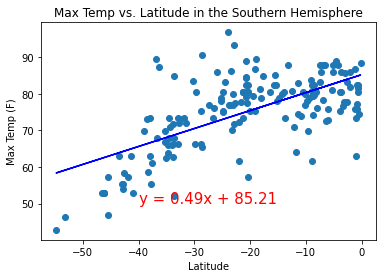

In [19]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_max_temp = southern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_max_temp)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_max_temp)
plt.plot(southern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (-40,50), fontsize=15, color ="red")
plt.title("Max Temp vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.17834559517999787


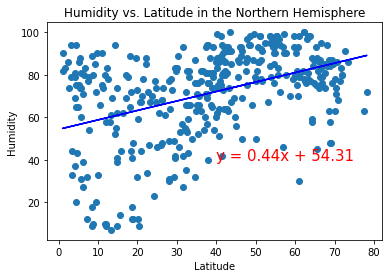

In [20]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_humidity = northern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_humidity)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_humidity)
plt.plot(northern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (40,40), fontsize=15, color ="red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.03486285339228994


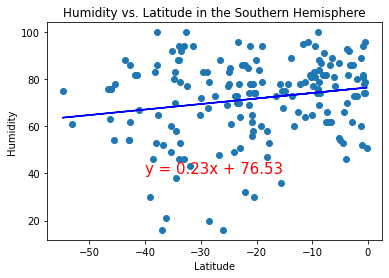

In [21]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_humidity = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_humidity)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_humidity)
plt.plot(southern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (-40,40), fontsize=15, color ="red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.057510483150791825


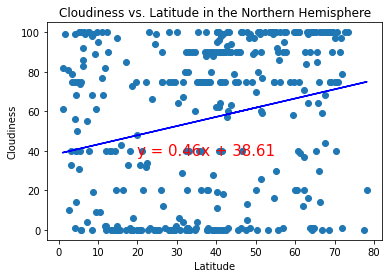

In [22]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_cloudiness = northern_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_cloudiness)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_cloudiness)
plt.plot(northern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (20,38), fontsize=15, color ="red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue**2}")
plt.show()

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.03486285339228994


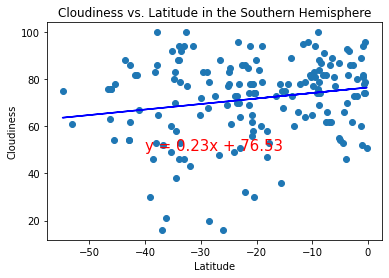

In [23]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_cloudiness = southern_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_cloudiness)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_cloudiness)
plt.plot(southern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (-40,50), fontsize=15, color ="red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is {rvalue**2}")
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.002414212389313493


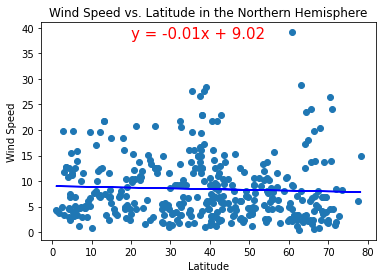

In [24]:
# Find the linear regression model
northern_latitude = northern_hem_df["Latitude"]
northern_wind = northern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_wind)
regress_values = northern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(northern_latitude, northern_wind)
plt.plot(northern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (20,38), fontsize=15, color ="red")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue**2}")
plt.show()

#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.13398716342883268


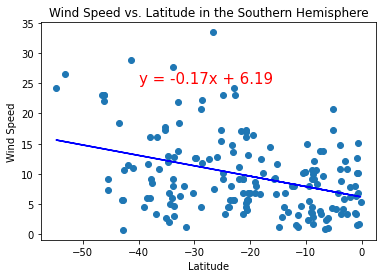

In [25]:
# Find the linear regression model
southern_latitude = southern_hem_df["Latitude"]
southern_wind = southern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_wind)
regress_values = southern_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the results in a scatter plot
plt.scatter(southern_latitude, southern_wind)
plt.plot(southern_latitude,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (-40,25), fontsize=15, color ="red")
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is {rvalue**2}")
plt.show()